# Morning Lecture  

### Use one of your existing enviornments that isn't base

# Functions

A **function** packages a reusable computation that can be called from anywhere in your notebook or other Python files.


### 1  Defining a function

```python
def function_name(param1, param2='default'):
    """One-sentence summary of what the function does.

    Parameters
    ----------
    param1 : type
        Meaning of the parameter.
    param2 : type, default 'default'
        Optional parameter with a default value.

    Returns
    -------
    something : type
        Description of returned value.
    """
    # body
    result = do_something(param1, param2)
    return result
```


In [2]:
# Try editing and running this example:

# TODO: write a greet function
def greet(name, time=''):
    """
    function that greets the name passed in argument

    parameters:
    name: str
        the name of the person greeting
    time: str, default=''
        optional parameter for greeting in the specific time of day

    Returns:
    f-string with correct greeting
    """

    keyword = ['morning', 'afternoon', 'evening', 'night']

    if time in keyword:
        return f'Good {time}, {name}!'
    return f'Hello, {name}!'

result = greet('Evan', 'afternoon')
print(result)
result = greet('Evan')
print(result)
    

Good afternoon, Evan!
Hello, Evan!


### 2  Variable-length arguments  

Python lets you accept any number of positional or keyword arguments:

```python
def describe(*items, **metadata):
    print("Items:", items)
    print("Metadata:", metadata)
```


In [3]:
def total_sum(*numbers, **options):
    """
    Adds up all supplied numbers. 
    Options:
      round_result: bool - whether to round the result to nearest integer
      report_out: bool - whether to print intermediate values
    """
    running = 0
    for n in numbers:
        if options.get('report_out'):
            print(f"Adding {n}, running total was {running}")
        running += n
    if options.get('round_result'):
        running = round(running)
    return running

# Examples:
print(total_sum(2.5, 3.1, 4.4))  


print(total_sum(2.5, 3.1, 4.4, round_result=True))  


print(total_sum(1, 2, 3, report_out=True))  



10.0
10
Adding 1, running total was 0
Adding 2, running total was 1
Adding 3, running total was 3
6


> **Exercise 1 — Fahrenheit → Celsius**  
> Write a function `to_celsius(f_temp)` that converts Fahrenheit to Celsius with one line of code and returns the result.  
> **Stretch:** Modify it to optionally return Kelvin when `scale='K'`.


In [7]:
# YOUR CODE HERE
def to_celcius(f_temp, scale=''):
    """
    converts farenheit to Celsius with one line of code and return result
    """

    celsius = (f_temp-32) * 5 / 9

    if scale == 'K':
        kelvin = celsius + 273
        return celsius, kelvin
    
    return celsius

to_celcius(32, scale='K')
to_celcius(100)
to_celcius(75, 'K')

(23.88888888888889, 296.8888888888889)

## 4  Using Modules

A *module* is a Python file that provides variables, functions, or classes.  
We’ll explore the built-in `math` and `random` modules, then import third-party `pandas`.


3.0


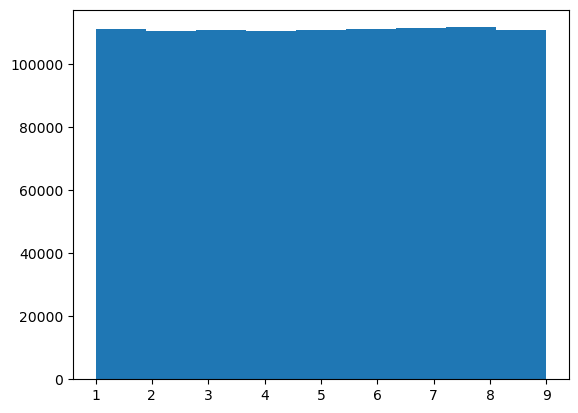

In [95]:
# TODO: play with math and random modules (i.e., look up some functions in them)
import math
import random
import matplotlib.pyplot as plt

print(math.sqrt(9))

number_gen = []

for _ in range(1000000):
    number_gen.append(random.randint(1,9))

plt.hist(number_gen, bins=9)
plt.show()


## 5  File I/O with CSV

CSV (comma-separated values) remains the lingua franca for tabular data.  
Two common approaches:

1. **`csv` module** - part of the standard library.  
2. **`pandas.read_csv`** - more powerful, returns a DataFrame.


In [9]:
import pandas as pd

# Create a sample DataFrame
data = {
    "Name": ["Alice", "Bob", "Charlie", "Diana"],
    "Age": [25, 30, 35, 40],
    "Score": [88.5, 92.0, 79.5, 85.0]
}
df_sample = pd.DataFrame(data)

# Save it as a CSV
df_sample.to_csv("sample_data.csv", index=False)
print("sample_data.csv created with sample rows:")
print(df_sample)

sample_data.csv created with sample rows:
      Name  Age  Score
0    Alice   25   88.5
1      Bob   30   92.0
2  Charlie   35   79.5
3    Diana   40   85.0


In [12]:
# TODO: read the provided sample_data.csv
import pandas as pd

df = pd.read_csv('sample_data.csv')

print(df)


      Name  Age  Score
0    Alice   25   88.5
1      Bob   30   92.0
2  Charlie   35   79.5
3    Diana   40   85.0


> **Exercise 2 — Random Walk Logger**  
> 1. Simulate 100 steps of a 1-D random walk (`+1` or `-1` per step).  
> 2. Store cumulative positions in a Python list.  
> - Save the result to `random_walk.csv` with two columns: `step`, `position`.  
> 4. Reload the CSV with `pandas` and plot the walk (hint: `df.plot.line()`).


<Axes: >

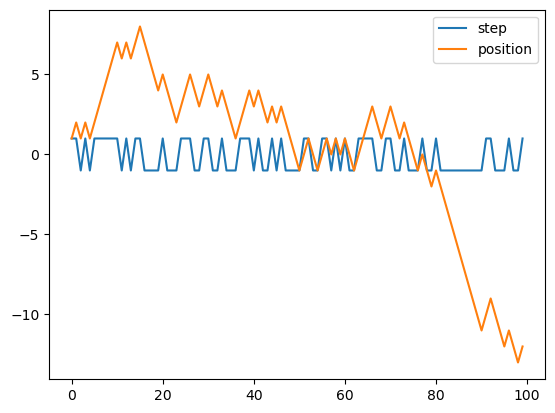

In [1]:
# YOUR CODE HERE
import pandas as pd
import random
import csv
import matplotlib

steps = []
positions = []

for i in range(100):
    steps.append(random.choice([-1,1]))
    if len(positions) > 0:
        positions.append(positions[i-1]+steps[i])
    else:
        positions.append(steps[i])

with open('random_walk.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['step', 'position'])
    writer.writerows(zip(steps, positions))

df = pd.read_csv('random_walk.csv')

df.plot.line()